In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [226]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [228]:
#check if there is any missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [229]:
#drop useless column 
df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

<Axes: ylabel='Frequency'>

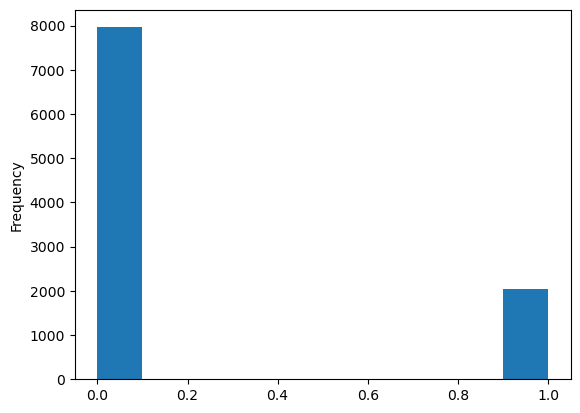

In [230]:
df.Exited.plot.hist()

In [231]:
(df.Exited==0).sum()
# 80%=>0
# 20%=>1

7963

In [232]:
#conver categorial to numaric
df=pd.get_dummies(data=df,drop_first=True)

In [233]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [234]:
df_2=df.drop(columns='Exited')

In [235]:
df_2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


<Axes: >

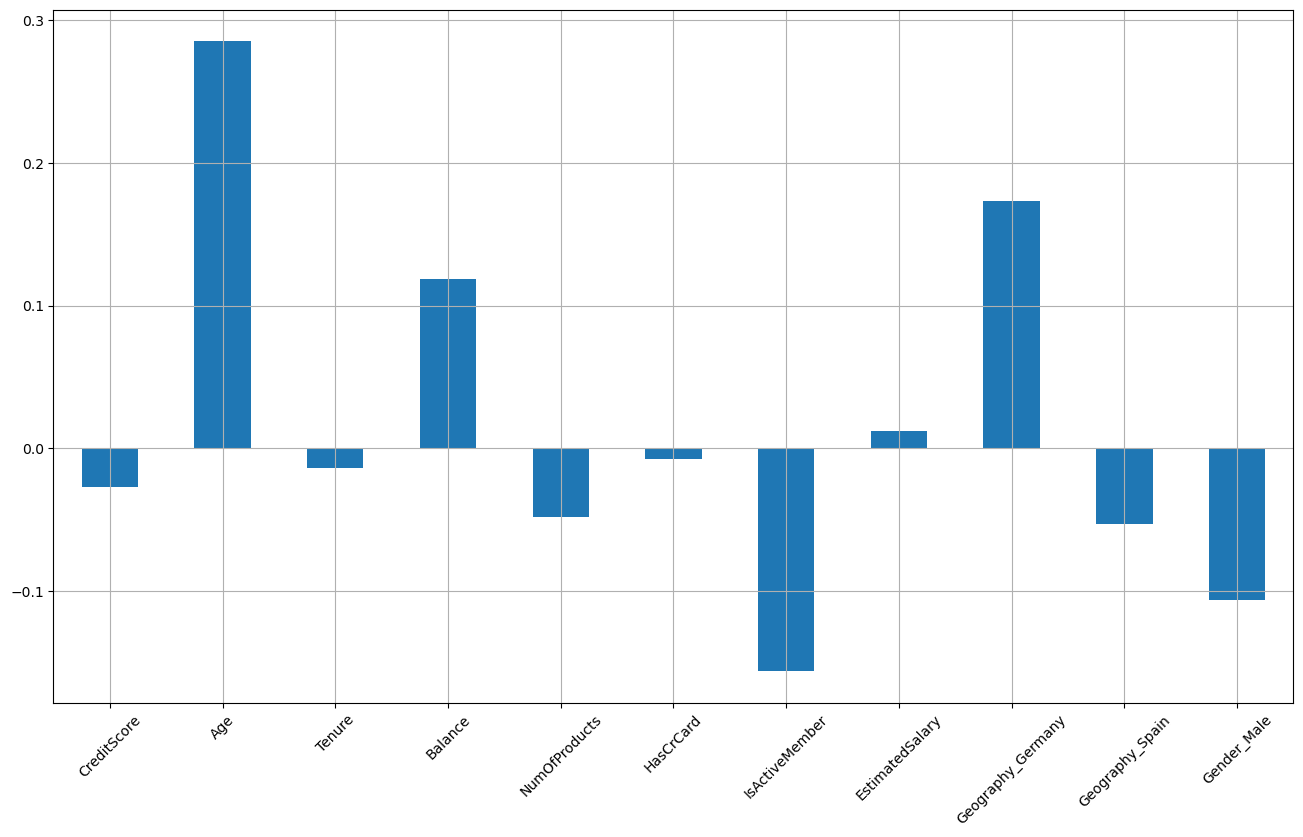

In [236]:
df_2.corrwith(df['Exited']).plot.bar(figsize=(16,9),rot=45,grid=True)

<Axes: >

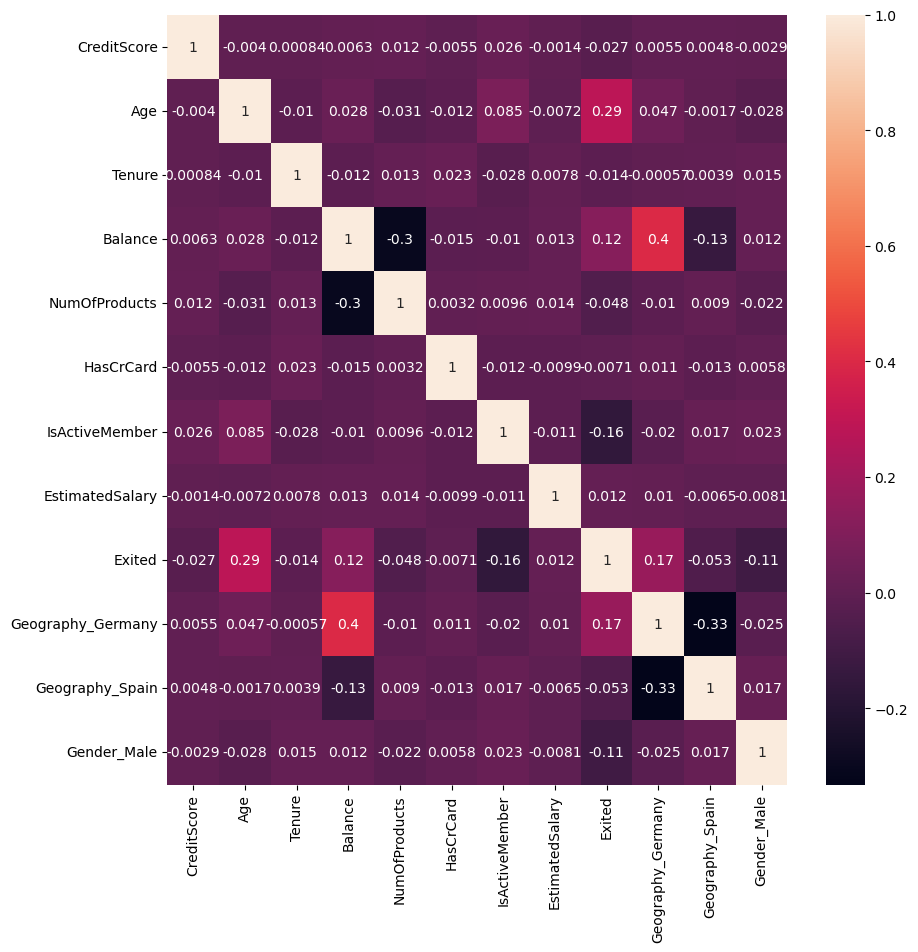

In [237]:
#draw a heatmap

corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [238]:
#split Data
X=df.drop(columns='Exited')
Y=df['Exited']

In [239]:
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88                  0              

In [240]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [242]:
print(X_train)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2694          628   29       3  113146.98              2          0   
5140          626   29       4  105767.28              2          0   
2568          612   47       6  130024.87              1          1   
3671          646   52       6  111739.40              2          0   
7427          714   33       8  122017.19              1          0   
...           ...  ...     ...        ...            ...        ...   
2895          621   47       7  107363.29              1          1   
7813          684   63       3   81245.79              1          1   
905           672   45       9       0.00              1          1   
5192          663   39       8       0.00              2          1   
235           763   42       6  100160.75              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2694               1        124749.08                  1              

In [243]:
#StanderdScaler=>removing the mean and scale to unit ver

from sklearn.preprocessing import StandardScaler

In [244]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [245]:
print(X_train)

[[-0.23082038 -0.94449979 -0.70174202 ...  1.71490137 -0.57273139
   0.91509065]
 [-0.25150912 -0.94449979 -0.35520275 ... -0.58312392 -0.57273139
  -1.09278791]
 [-0.3963303   0.77498705  0.33787579 ...  1.71490137 -0.57273139
  -1.09278791]
 ...
 [ 0.22433188  0.58393295  1.3774936  ... -0.58312392 -0.57273139
  -1.09278791]
 [ 0.13123255  0.01077067  1.03095433 ... -0.58312392 -0.57273139
  -1.09278791]
 [ 1.1656695   0.29735181  0.33787579 ...  1.71490137 -0.57273139
   0.91509065]]


In [246]:
#def logisticRegression Model

from sklearn.linear_model import LogisticRegression


In [247]:
lg=LogisticRegression(random_state=0)
lg.fit(X_train,y_train)
Y_pred=lg.predict(X_test)

In [248]:
#classifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [249]:
acc=accuracy_score(y_test,Y_pred)
f1=f1_score(y_test,Y_pred)
recall=recall_score(y_test,Y_pred)
pre=precision_score(y_test,Y_pred)


In [250]:
print("accuracy_score=",acc)
print("f1_score=",f1)
print("recall_score=",recall)
print("precision_score=",pre)

accuracy_score= 0.8125
f1_score= 0.3291592128801431
recall_score= 0.2216867469879518
precision_score= 0.6388888888888888


In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [253]:
acc=accuracy_score(y_test,rf_pred)
f1=f1_score(y_test,rf_pred)
recall=recall_score(y_test,rf_pred)
pre=precision_score(y_test,rf_pred)


In [254]:
print("accuracy_score=",acc)
print("f1_score=",f1)
print("recall_score=",recall)
print("precision_score=",pre)

accuracy_score= 0.8605
f1_score= 0.5727411944869831
recall_score= 0.4506024096385542
precision_score= 0.7857142857142857
